Concatenando as ligas: \
Premier League (Inglaterra) \
La Liga 1 (Espanha) \
La Liga 2 (Espanha) \
Serie A (Itália) \
Serie B (Itália) \
Ligue 1 (França) \
Ligue 2 (França) 

In [1]:
import pandas as pd

# Carregar os dados das ligas
df1 = pd.read_csv('E0.csv')
df1['Liga'] = 'Premier League'

df2 = pd.read_csv('I1.csv')
df2['Liga'] = 'Liga Italiana 1'

df3 = pd.read_csv('I2.csv')
df3['Liga'] = 'Liga Italiana 2'

df4 = pd.read_csv('SP1.csv')
df4['Liga'] = 'La Liga'

df5 = pd.read_csv('F1.csv')
df5['Liga'] = 'Liga Francesa'

# Concatenar os DataFrames
df_concatenado = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

# Função para calcular as rodadas por liga
def calcular_rodadas(df):
    total_jogos = len(df)
    numero_rodadas = total_jogos // 10
    df['Rodada'] = (df.index - df.index[0]) // 10 + 1
    return df

# Aplicar o cálculo de rodadas para cada liga
df_concatenado = df_concatenado.groupby('Liga').apply(calcular_rodadas).reset_index(drop=True)



In [2]:
# Exibir as primeiras 20 linhas
print(df_concatenado[['Date', 'HomeTeam', 'AwayTeam', 'Rodada', 'Liga']].head(10))

         Date    HomeTeam     AwayTeam  Rodada     Liga
0  12/08/2022     Osasuna      Sevilla       1  La Liga
1  13/08/2022       Celta      Espanol       1  La Liga
2  13/08/2022  Valladolid   Villarreal       1  La Liga
3  13/08/2022   Barcelona    Vallecano       1  La Liga
4  14/08/2022       Cadiz     Sociedad       1  La Liga
5  14/08/2022    Valencia       Girona       1  La Liga
6  14/08/2022     Almeria  Real Madrid       1  La Liga
7  15/08/2022  Ath Bilbao     Mallorca       1  La Liga
8  15/08/2022      Getafe   Ath Madrid       1  La Liga
9  15/08/2022       Betis        Elche       1  La Liga


In [3]:
# Exibir as últimas 20 linhas
print(df_concatenado[['Date', 'HomeTeam', 'AwayTeam', 'Rodada', 'Liga']].tail(10))

            Date        HomeTeam       AwayTeam  Rodada            Liga
1890  28/05/2023         Arsenal         Wolves      38  Premier League
1891  28/05/2023     Aston Villa       Brighton      38  Premier League
1892  28/05/2023       Brentford       Man City      38  Premier League
1893  28/05/2023         Chelsea      Newcastle      38  Premier League
1894  28/05/2023  Crystal Palace  Nott'm Forest      38  Premier League
1895  28/05/2023         Everton    Bournemouth      38  Premier League
1896  28/05/2023           Leeds      Tottenham      38  Premier League
1897  28/05/2023       Leicester       West Ham      38  Premier League
1898  28/05/2023      Man United         Fulham      38  Premier League
1899  28/05/2023     Southampton      Liverpool      38  Premier League


In [48]:
df_concatenado.rename(columns={
    'Date': 'Data',
    'Time': 'Hora',
    'HomeTeam': 'Time Mandante',
    'AwayTeam': 'Time Visitante',
    'FTHG': 'Gols Casa FT',
    'FTAG': 'Gols Visitante FT',
    'FTR': 'Resultado',
    'HTHG': 'Gols Casa HT',
    'HTAG': 'Gols Visitante HT',
    'B365H': 'Odd Mandante',
    'B365D': 'Odd Empate',
    'B365A': 'Odd Visitante'
}, inplace=True)


In [49]:
df_concatenado

,Div,Data,Hora,Time Mandante,Time Visitante,Gols Casa FT,Gols Visitante FT,Resultado,Gols Casa HT,Gols Visitante HT,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Liga,Rodada
0,SP1,12/08/2022,20:00,Osasuna,Sevilla,2,1,H,1,1,...,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09,La Liga,1
1,SP1,13/08/2022,16:00,Celta,Espanol,2,2,D,1,0,...,2.00,1.90,2.02,1.91,2.06,1.93,2.01,1.86,La Liga,1
2,SP1,13/08/2022,18:00,Valladolid,Villarreal,0,3,A,0,0,...,2.02,1.88,2.02,1.91,2.03,1.91,1.98,1.88,La Liga,1
3,SP1,13/08/2022,20:00,Barcelona,Vallecano,0,0,D,0,0,...,1.82,2.08,1.83,2.08,1.86,2.14,1.82,2.06,La Liga,1
4,SP1,14/08/2022,16:30,Cadiz,Sociedad,0,1,A,0,1,...,2.05,1.85,2.06,1.87,2.08,1.92,2.00,1.86,La Liga,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,E0,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,...,2.02,1.77,2.10,1.81,2.17,1.92,2.03,1.83,Premier League,38
1896,E0,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,...,1.84,2.06,1.83,2.10,1.90,2.14,1.81,2.06,Premier League,38
1897,E0,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,...,1.75,2.05,1.85,2.06,1.90,2.16,1.82,2.04,Premier League,38
1898,E0,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,...,1.98,1.92,1.98,1.93,2.07,1.98,1.97,1.89,Premier League,38


In [50]:
# Criar a nova coluna 'Total Gols HT'
df_concatenado['Total Gols HT'] = df_concatenado['Gols Casa HT'] + df_concatenado['Gols Visitante HT']

# Selecionar apenas as colunas desejadas, incluindo 'Total Gols HT'
colunas_desejadas = ['Div', 'Data', 'Hora', 'Time Mandante', 'Time Visitante', 
                     'Gols Casa FT', 'Gols Visitante FT', 'Resultado', 
                     'Gols Casa HT', 'Gols Visitante HT', 'Total Gols HT', 
                     'Rodada', 'Odd Mandante', 'Odd Empate', 'Odd Visitante', 'Liga']

# Filtrar as colunas no DataFrame
df_filtrado = df_concatenado[colunas_desejadas]

# Exibir as primeiras linhas para verificar
print(df_filtrado.head(20))

    Div        Data   Hora Time Mandante Time Visitante  Gols Casa FT  \
0   SP1  12/08/2022  20:00       Osasuna        Sevilla             2   
1   SP1  13/08/2022  16:00         Celta        Espanol             2   
2   SP1  13/08/2022  18:00    Valladolid     Villarreal             0   
3   SP1  13/08/2022  20:00     Barcelona      Vallecano             0   
4   SP1  14/08/2022  16:30         Cadiz       Sociedad             0   
5   SP1  14/08/2022  18:30      Valencia         Girona             1   
6   SP1  14/08/2022  21:00       Almeria    Real Madrid             1   
7   SP1  15/08/2022  16:30    Ath Bilbao       Mallorca             0   
8   SP1  15/08/2022  18:30        Getafe     Ath Madrid             0   
9   SP1  15/08/2022  20:30         Betis          Elche             3   
10  SP1  19/08/2022  19:00       Espanol      Vallecano             0   
11  SP1  19/08/2022  21:00       Sevilla     Valladolid             1   
12  SP1  20/08/2022  16:30       Osasuna          C

Probabilidade de vitória dos mandantes

C:\Users\msdof\AppData\Local\Temp\ipykernel_9928\4292409360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Vitoria Mandante'] = (df_filtrado['Gols Casa FT'] > df_filtrado['Gols Visitante FT']).astype(int)


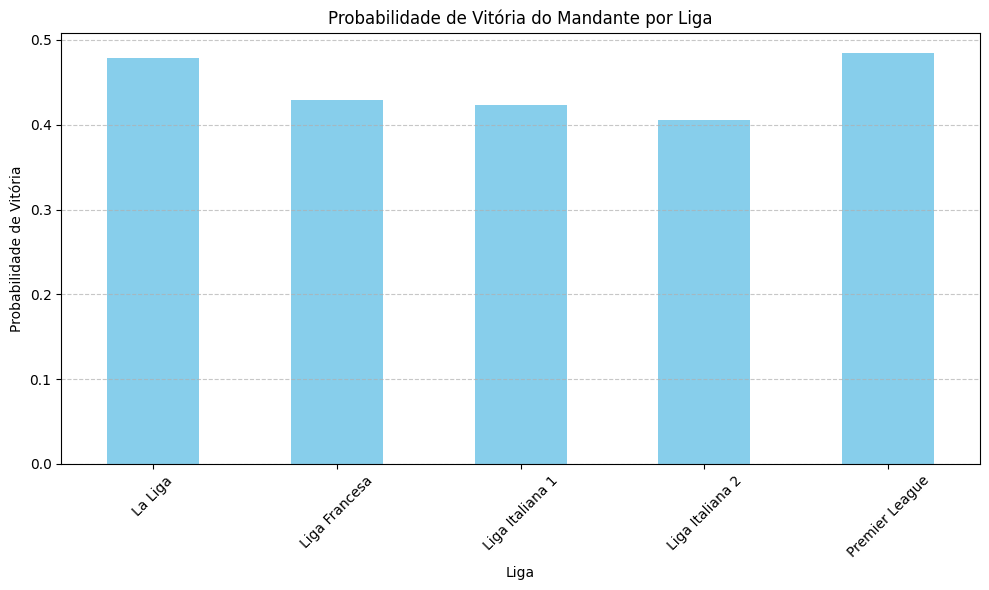

In [51]:
import matplotlib.pyplot as plt

# Criar uma coluna indicando se o mandante venceu (1) ou não (0)
df_filtrado['Vitoria Mandante'] = (df_filtrado['Gols Casa FT'] > df_filtrado['Gols Visitante FT']).astype(int)

# Agrupar por liga e calcular a probabilidade de vitória do mandante
probabilidade_vitoria = df_filtrado.groupby('Liga')['Vitoria Mandante'].mean()

# Plotar a probabilidade de vitória do mandante por liga
plt.figure(figsize=(10, 6))
probabilidade_vitoria.plot(kind='bar', color='skyblue')
plt.title('Probabilidade de Vitória do Mandante por Liga')
plt.xlabel('Liga')
plt.ylabel('Probabilidade de Vitória')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\msdof\AppData\Local\Temp\ipykernel_9928\4020959561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Diferenca Gols'] = df_filtrado['Gols Casa FT'] - df_filtrado['Gols Visitante FT']


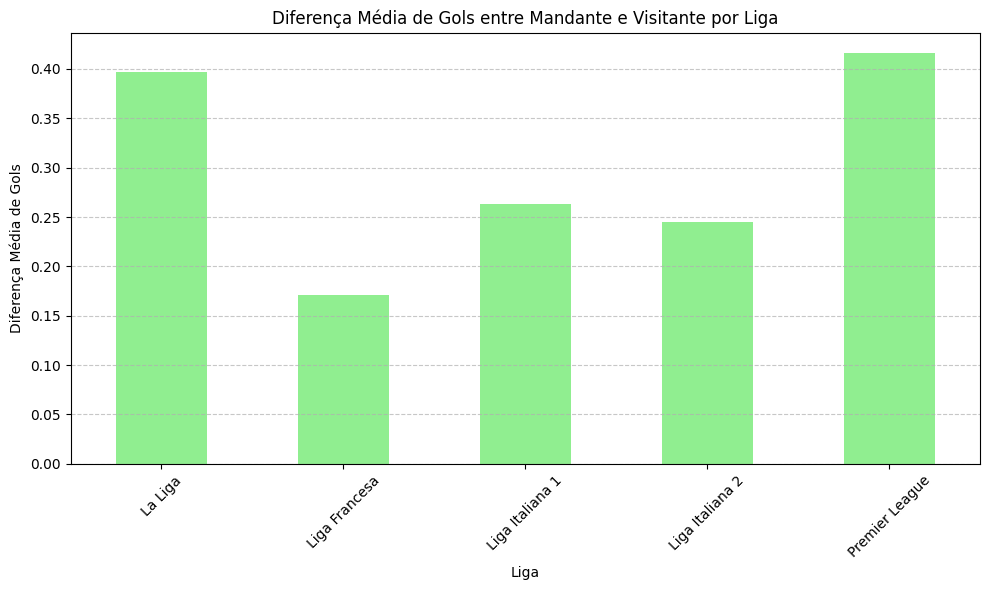

In [53]:
# Criar uma coluna com a diferença de gols entre mandante e visitante
df_filtrado['Diferenca Gols'] = df_filtrado['Gols Casa FT'] - df_filtrado['Gols Visitante FT']

# Agrupar por liga e calcular a média da diferença de gols
diferenca_media_gols = df_filtrado.groupby('Liga')['Diferenca Gols'].mean()

# Plotar a diferença média de gols entre mandante e visitante por liga
plt.figure(figsize=(10, 6))
diferenca_media_gols.plot(kind='bar', color='lightgreen')
plt.title('Diferença Média de Gols entre Mandante e Visitante por Liga')
plt.xlabel('Liga')
plt.ylabel('Diferença Média de Gols')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\msdof\AppData\Local\Temp\ipykernel_9928\246548512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Resultado Mandante'] = df_filtrado.apply(lambda row: 'Vitória' if row['Gols Casa FT'] > row['Gols Visitante FT']


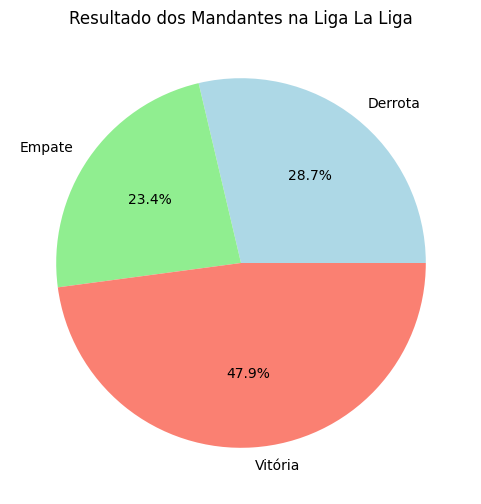

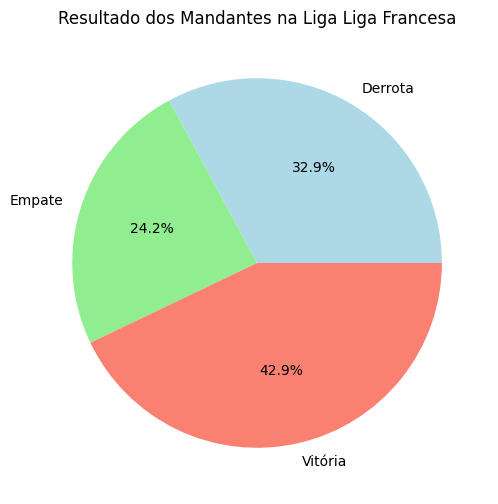

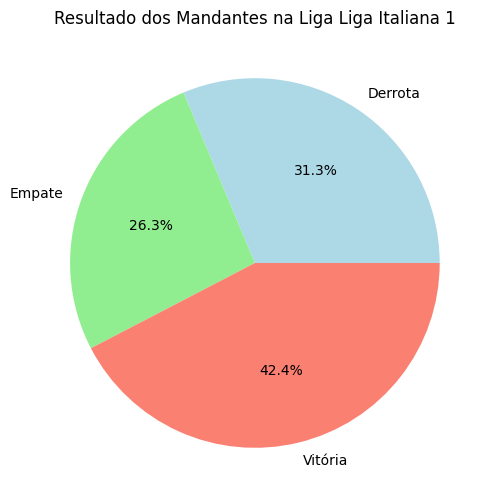

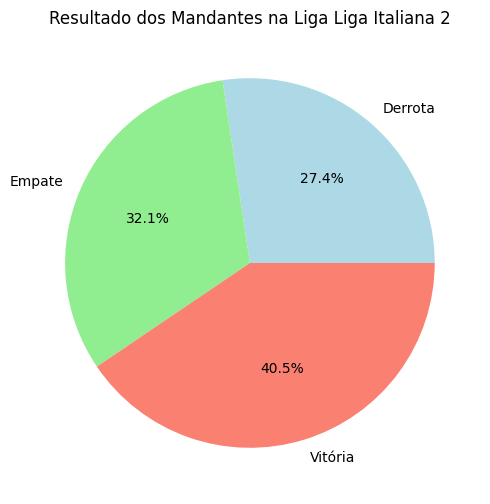

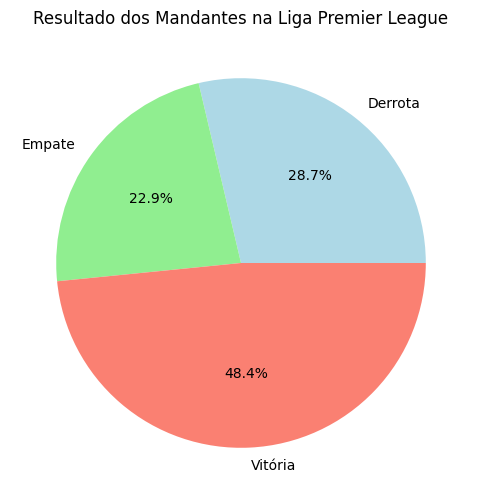

In [55]:
# Contar vitórias, empates e derrotas dos mandantes
df_filtrado['Resultado Mandante'] = df_filtrado.apply(lambda row: 'Vitória' if row['Gols Casa FT'] > row['Gols Visitante FT'] 
                                                     else ('Empate' if row['Gols Casa FT'] == row['Gols Visitante FT'] else 'Derrota'), axis=1)

# Agrupar por liga e contar os resultados
resultados_mandantes = df_filtrado.groupby(['Liga', 'Resultado Mandante']).size().unstack(fill_value=0)

# Plotar um gráfico de pizza para cada liga
for liga in resultados_mandantes.index:
    resultados = resultados_mandantes.loc[liga]
    plt.figure(figsize=(6, 6))
    plt.pie(resultados, labels=resultados.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
    plt.title(f'Resultado dos Mandantes na Liga {liga}')
    plt.show()


<Figure size 1200x600 with 0 Axes>

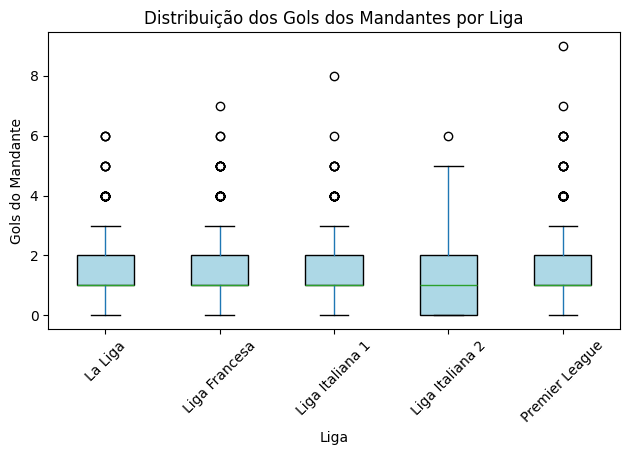

In [57]:
# Plotar um boxplot para a distribuição de gols do mandante por liga
plt.figure(figsize=(12, 6))
df_filtrado.boxplot(column='Gols Casa FT', by='Liga', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribuição dos Gols dos Mandantes por Liga')
plt.suptitle('')  # Remove o título padrão do boxplot
plt.xlabel('Liga')
plt.ylabel('Gols do Mandante')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

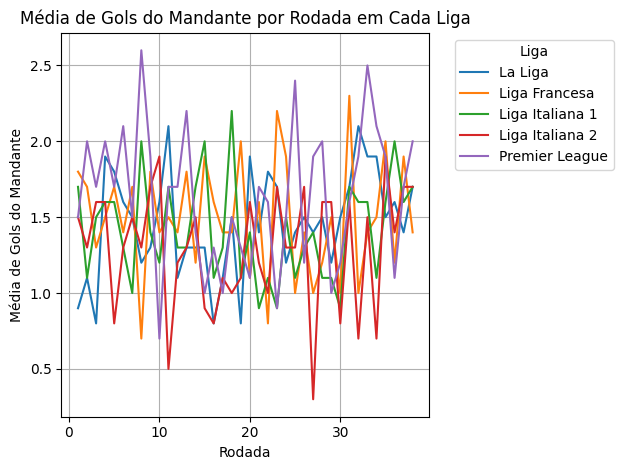

In [59]:
# Agrupar por liga e rodada e calcular a média de gols do mandante
media_gols_rodada = df_filtrado.groupby(['Liga', 'Rodada'])['Gols Casa FT'].mean().unstack()

# Plotar gráfico de linha para a média de gols do mandante por rodada em cada liga
plt.figure(figsize=(12, 6))
media_gols_rodada.T.plot()
plt.title('Média de Gols do Mandante por Rodada em Cada Liga')
plt.xlabel('Rodada')
plt.ylabel('Média de Gols do Mandante')
plt.legend(title='Liga', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


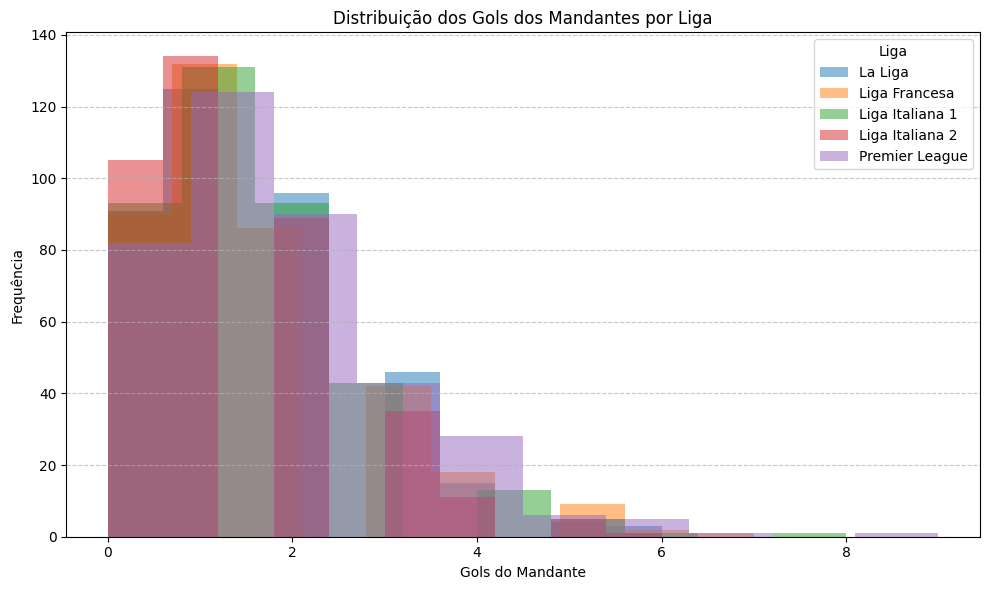

In [62]:
# Plotar um histograma para os gols dos mandantes por liga
plt.figure(figsize=(10, 6))
for liga in df_filtrado['Liga'].unique():
    subset = df_filtrado[df_filtrado['Liga'] == liga]
    plt.hist(subset['Gols Casa FT'], bins=10, alpha=0.5, label=liga)

plt.title('Distribuição dos Gols dos Mandantes por Liga')
plt.xlabel('Gols do Mandante')
plt.ylabel('Frequência')
plt.legend(title='Liga')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


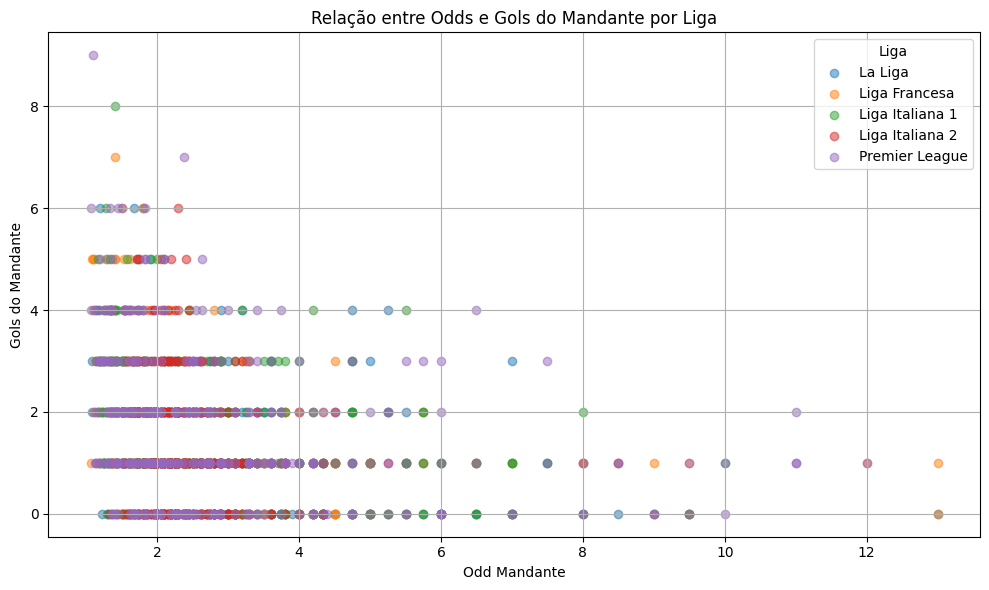

In [63]:
# Scatter plot para visualizar a relação entre a odd do mandante e o resultado (gols)
plt.figure(figsize=(10, 6))
for liga in df_filtrado['Liga'].unique():
    subset = df_filtrado[df_filtrado['Liga'] == liga]
    plt.scatter(subset['Odd Mandante'], subset['Gols Casa FT'], alpha=0.5, label=liga)

plt.title('Relação entre Odds e Gols do Mandante por Liga')
plt.xlabel('Odd Mandante')
plt.ylabel('Gols do Mandante')
plt.legend(title='Liga')
plt.grid(True)
plt.tight_layout()
plt.show()


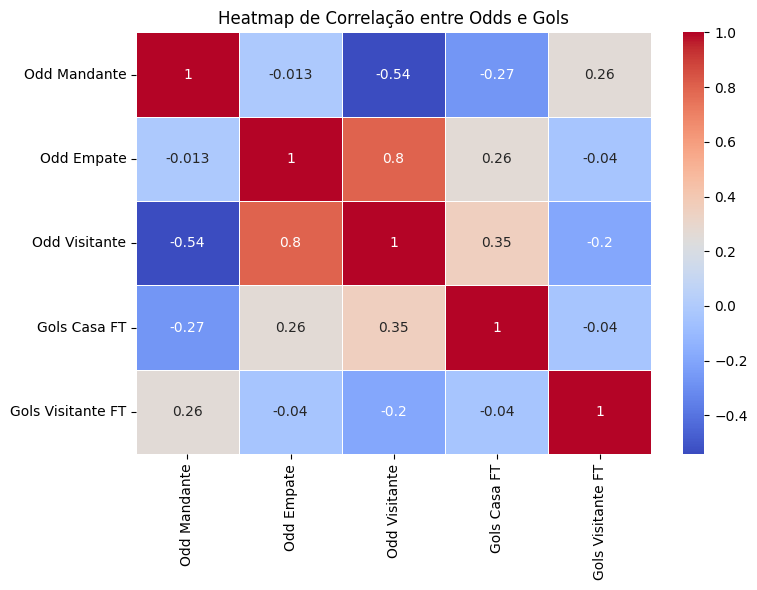

In [64]:
import seaborn as sns

# Selecionar as colunas numéricas relevantes
dados_corr = df_filtrado[['Odd Mandante', 'Odd Empate', 'Odd Visitante', 'Gols Casa FT', 'Gols Visitante FT']]

# Calcular a correlação
correlacao = dados_corr.corr()

# Plotar o heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação entre Odds e Gols')
plt.tight_layout()
plt.show()
